<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_binaryclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for binary classification

Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [3]:
#30 features
dataset['data'].shape

(569, 30)

In [4]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

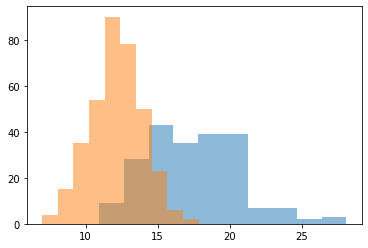

In [7]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [10]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


In [0]:
df = pd.DataFrame(data=X_train, columns=dataset.feature_names)

In [0]:
df['target'] = y_train

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.18,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.011790,0.011310,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376,1
1,11.71,17.19,74.68,420.3,0.09774,0.06141,0.038090,0.032390,0.1516,0.06095,0.2451,0.7655,1.742,17.86,0.006905,0.008704,0.019780,0.011850,0.01897,0.001671,13.01,21.39,84.42,521.5,0.13230,0.10400,0.15210,0.10990,0.2572,0.07097,1
2,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.132400,0.097020,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.025440,0.028220,0.016230,0.01956,0.003740,28.01,28.22,184.20,2403.0,0.12280,0.35830,0.39480,0.23460,0.3589,0.09187,0
3,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,0.06275,0.2253,0.6457,1.527,17.37,0.006131,0.012630,0.009075,0.008231,0.01713,0.004414,13.65,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464,1
4,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,0.2239,1.6470,1.489,15.46,0.004359,0.006813,0.003223,0.003419,0.01916,0.002534,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,1


In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.114009,19.312484,91.920857,655.822857,0.096584,0.105392,0.088846,0.049050,0.181805,0.062948,0.408812,1.221678,2.902991,40.892446,0.007091,0.025821,0.031593,0.011741,0.020654,0.003791,16.259273,25.730176,107.299319,881.377582,0.132732,0.258389,0.273700,0.114498,0.290888,0.084241,0.619780
std,3.616429,4.327790,24.940162,363.304216,0.014131,0.053510,0.079486,0.039272,0.027888,0.007203,0.292259,0.569892,2.139810,48.373180,0.003068,0.018123,0.027035,0.006118,0.008588,0.002508,4.932217,6.250084,34.418336,582.109806,0.022838,0.160814,0.211286,0.066103,0.062343,0.018317,0.485975
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.160000,74.720000,416.250000,0.086390,0.066160,0.029035,0.020530,0.162750,0.057805,0.231250,0.828350,1.601500,17.670000,0.005190,0.013225,0.014695,0.007555,0.015015,0.002253,12.975000,21.130000,83.990000,511.500000,0.116700,0.148600,0.115450,0.064075,0.250800,0.071945,0.000000
50%,13.340000,18.840000,86.100000,546.400000,0.095970,0.095460,0.063350,0.034000,0.180000,0.061660,0.319800,1.127000,2.310000,24.190000,0.006472,0.020650,0.026260,0.011030,0.018780,0.003187,14.910000,25.440000,97.330000,680.600000,0.131400,0.218600,0.226700,0.101700,0.282200,0.079990,1.000000
75%,15.765000,21.875000,103.750000,781.800000,0.105400,0.130600,0.132000,0.073895,0.196650,0.066565,0.474700,1.473500,3.334500,45.145000,0.008182,0.033065,0.042420,0.014965,0.023360,0.004560,18.775000,29.915000,125.650000,1077.000000,0.146000,0.341800,0.385900,0.161300,0.319600,0.092745,1.000000
max,28.110000,33.810000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.303800,0.040900,0.078950,0.022860,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f423bd00198>,
      dtype=object)

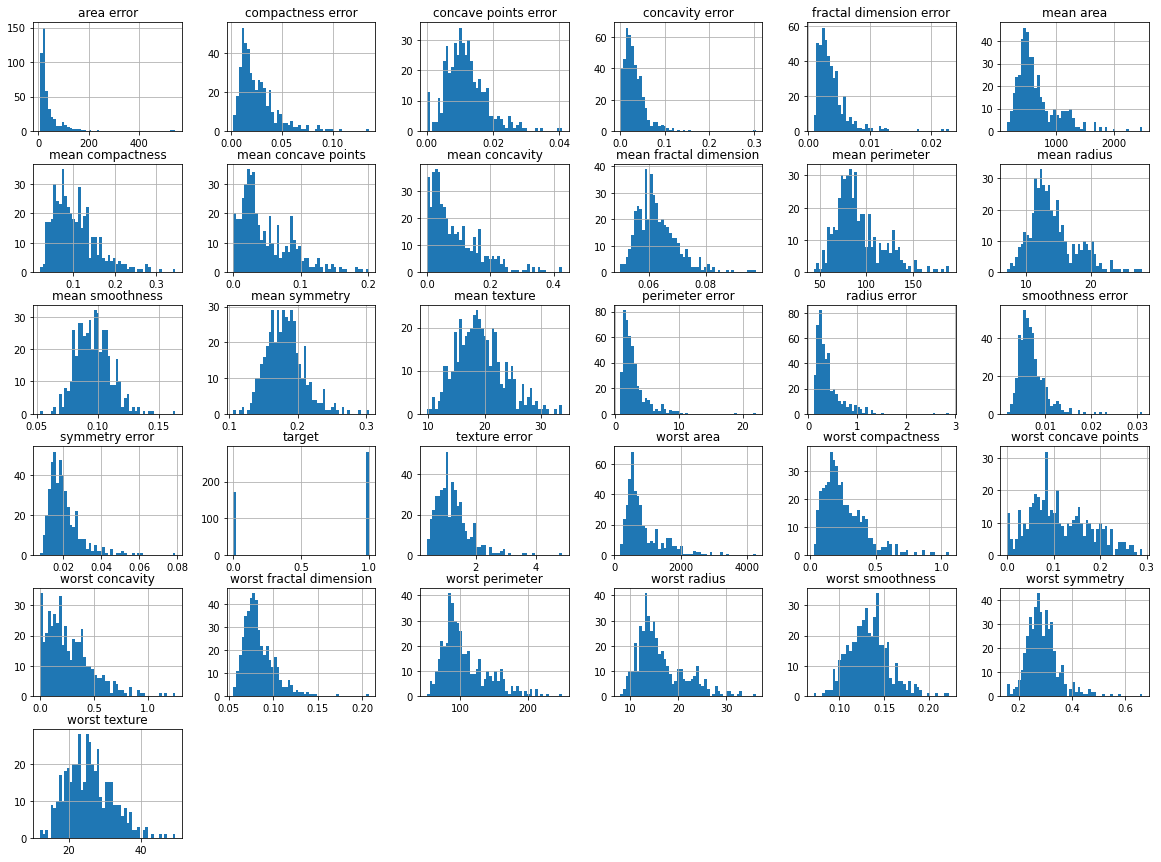

In [15]:
# show data
df.hist(bins=50, figsize=(20,15))

In [0]:
#standard correlation coefficient
corr_mx = df.corr()

In [17]:
corr_mx['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.047738
mean fractal dimension     0.022580
symmetry error            -0.020271
texture error             -0.020918
fractal dimension error   -0.098777
worst fractal dimension   -0.314273
concavity error           -0.319757
compactness error         -0.320965
mean symmetry             -0.323129
mean smoothness           -0.350859
worst symmetry            -0.406416
worst smoothness          -0.409864
mean texture              -0.439074
concave points error      -0.447096
worst texture             -0.469371
area error                -0.539384
perimeter error           -0.558174
radius error              -0.568833
worst compactness         -0.593160
mean compactness          -0.599931
worst concavity           -0.662654
mean area                 -0.701482
mean concavity            -0.713452
worst area                -0.726083
mean radius               -0.726375
mean perimeter            -0.739216
worst radius              -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f423b0fada0>,
      dtype=object)

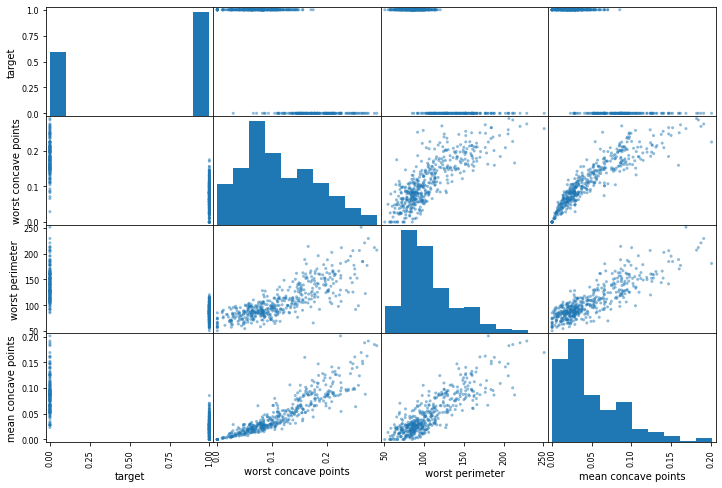

In [18]:
attributes = ['target', 'worst concave points', 'worst perimeter', 'mean concave points']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

In [0]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

###Train model

In [0]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train_processed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###Evaluation

k-th cross validation

In [22]:
#k-th cross validation
cv = 3 #the number of foldings
cross_val_score(model, X_train_processed, y_train, cv=cv, scoring='accuracy')

array([0.90131579, 0.93421053, 0.94039735])

confusion matrix

In [0]:
#calculate confusion matrix
y_train_pred = cross_val_predict(model, X_train_processed, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)

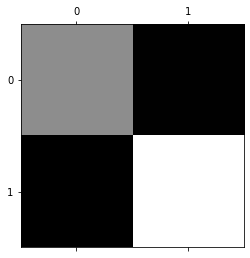

In [24]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

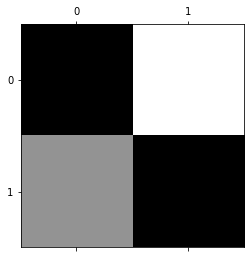

In [25]:
#convert to error probability
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#set diagonal to 0 for visibility
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

various scores

In [26]:
accuracy_score(y_train, y_train_pred)

0.9186813186813186

In [27]:
precision_score(y_train, y_train_pred)

0.9328621908127208

In [28]:
recall_score(y_train, y_train_pred)

0.9361702127659575

In [29]:
f1_score(y_train, y_train_pred)

0.9345132743362832

In [30]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       173
           1       0.93      0.94      0.93       282

    accuracy                           0.92       455
   macro avg       0.91      0.91      0.91       455
weighted avg       0.92      0.92      0.92       455



In [0]:
y_train_probas = cross_val_predict(model, X_train_processed, y_train, cv=cv, method='predict_proba')

In [0]:
y_train_scores = y_train_probas[:, 1]

In [0]:
def plot_pr_curve(y, y_score, label=None):

    fpr, tpr, thresholds = precision_recall_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    return

No handles with labels found to put in legend.


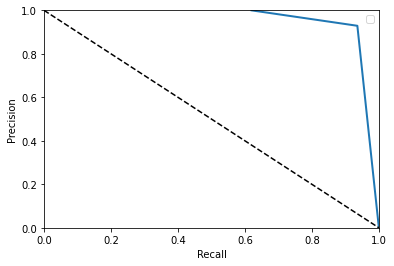

In [34]:
plot_pr_curve(y_train, y_train_scores)
plt.show()

In [0]:
def plot_roc_curve(y, y_score, label=None):

    fpr, tpr, thresholds = roc_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    return

No handles with labels found to put in legend.


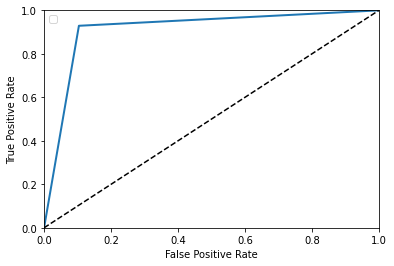

In [36]:
plot_roc_curve(y_train, y_train_scores)
plt.show()

In [37]:
roc_auc_score(y_train, y_train_scores)

0.9125158857049154

###Test

In [0]:
y_test_pred = model.predict(scaler.transform(X_test))

In [39]:
accuracy_score(y_test, y_test_pred)

0.9298245614035088

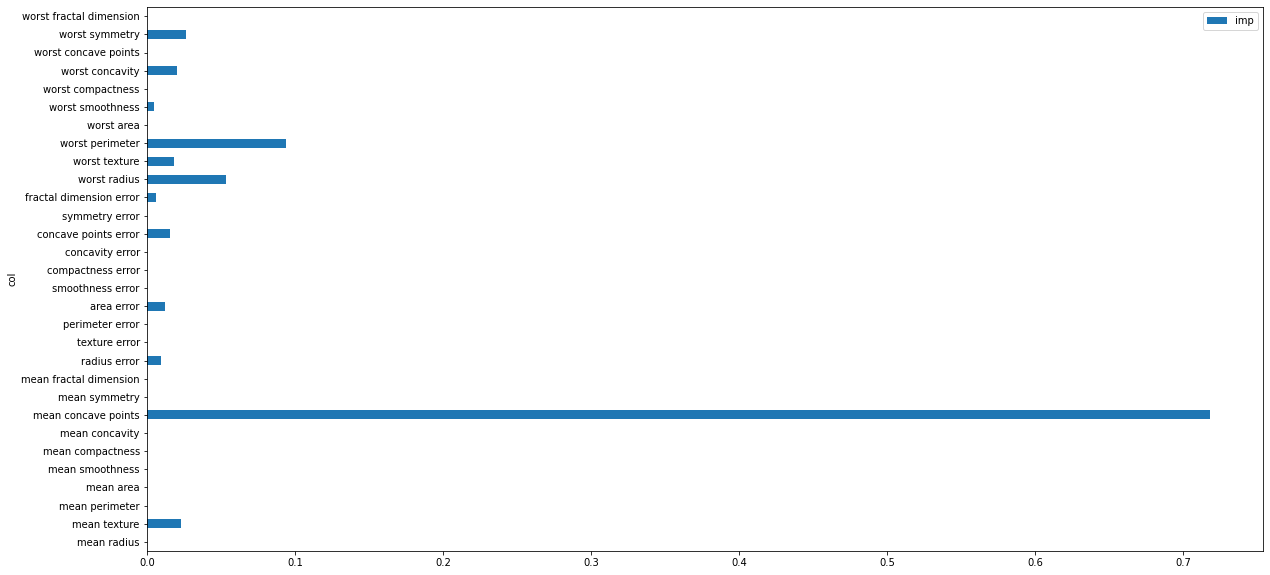

In [40]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': dataset['feature_names']})
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

###Save

In [0]:
#save the prediction
submissiondir = '.'
submissionname = 'submission'
pd.DataFrame(data={'target':y_test, 'prediction':y_test_pred}).to_csv(submissiondir + '/' + submissionname + ".csv", index_label=["Id"])

In [42]:
# save the model
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [43]:
# load the model
loaded_model = joblib.load(filename)
result = loaded_model.score(scaler.transform(X_test), y_test)
print(result)

0.9298245614035088
